# <font color='maroon'>**Dataset Selection**</font>



## **Overview**:
 The data selected below is collected from the online dataset website "Kaggle" and it is in a raw and csv form of data and ready to be cleaned and processed using Apache spark.

 The dataset contains information collected for customer segmentation to assist marketing analysis. It includes demographic, geographic, behavioral, and psychographic data. The goal is to identify distinct customer groups to enhance targeted marketing strategies and improve business outcomes.



## **Key Features**:
 - **Demographics**: Information about customers such as age, gender, and income.
 - **Behavioral Data**: Purchase history, frequency of transactions, and shopping patterns.
 - **Geographic Data**: Customer location and regional preferences.
 - **Psychographics**: Insights into customer attitudes, interests, and lifestyle preferences.

## **Purpose**:
 This dataset is designed to enable businesses to:
 - Segment their customer base.
 - Tailor marketing campaigns for different customer groups.
 - Improve customer retention and acquisition strategies.
 - Enhance product offerings based on customer preferences.

## **Dataset Source**:
Chowdhury, F. (2024) Customer Segmentation Data for Marketing Analysis, Kaggle. Available at: https://www.kaggle.com/datasets/fahmidachowdhury/customer-segmentation-data-for-marketing-analysis (Accessed: 8 January 2025).


# <font color='maroon'>**Dataset Importing**</font>



In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fahmidachowdhury/customer-segmentation-data-for-marketing-analysis")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/fahmidachowdhury/customer-segmentation-data-for-marketing-analysis/versions/1


In [37]:
import os
import pandas as pd

# Path to the dataset folder
dataset_path = "/root/.cache/kagglehub/datasets/fahmidachowdhury/customer-segmentation-data-for-marketing-analysis/versions/1"

# Get the CSV file in the directory
files = os.listdir(dataset_path)
dataset_file = next(f for f in files if f.endswith('.csv'))

# Construct the full file path
file_path = os.path.join(dataset_path, dataset_file)
print(f"Loading dataset: {file_path}")

# Load dataset and print the first 20 rows
df = pd.read_csv(file_path)
print("First 20 rows of the dataset:")
df.head(20)

Loading dataset: /root/.cache/kagglehub/datasets/fahmidachowdhury/customer-segmentation-data-for-marketing-analysis/versions/1/customer_segmentation_data.csv
First 20 rows of the dataset:


,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08
5,6,31,Other,57305,24,3,30,Home & Garden,86.85
6,7,19,Other,54319,68,5,43,Clothing,191.72
7,8,43,Male,108115,94,9,27,Groceries,734.56
8,9,53,Male,34424,29,6,7,Sports,951.71
9,10,55,Female,45839,55,7,2,Electronics,821.18


# <font color='maroon'>**Dataset Preprocessong and Visualization**</font>



In [14]:
pip install pandas numpy matplotlib seaborn scikit-learn pyspark


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [15]:
# Missing Values?
df.isnull().sum()

,0
id,0
age,0
gender,0
income,0
spending_score,0
membership_years,0
purchase_frequency,0
preferred_category,0
last_purchase_amount,0


In [42]:
import os
print(os.listdir('/root/.cache/kagglehub/datasets/fahmidachowdhury/customer-segmentation-data-for-marketing-analysis/versions/1'))


['customer_segmentation_data.csv']


In [47]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/root/.cache/kagglehub/datasets/fahmidachowdhury/customer-segmentation-data-for-marketing-analysis/versions/1/customer_segmentation_data.csv')

# Display the first few rows to inspect the data
print("Original Data:")
print(df.head())

# Strip any leading or trailing whitespace from the 'gender' column
df['gender'] = df['gender'].str.strip()

# Remove rows where 'Gender' is not 'Male' or 'Female'
df_cleaned = df[df['gender'].isin(['Male', 'Female'])]

# Remove the 'preferred_category' column as it is not important
if 'preferred_category' in df_cleaned.columns:
    df_cleaned = df_cleaned.drop(columns=['preferred_category'])

# Display the cleaned data
print("\nCleaned Data:")
df_cleaned.head()



Original Data:
   id  age  gender  income  spending_score  membership_years  \
0   1   38  Female   99342              90                 3   
1   2   21  Female   78852              60                 2   
2   3   60  Female  126573              30                 2   
3   4   40   Other   47099              74                 9   
4   5   65  Female  140621              21                 3   

   purchase_frequency preferred_category  last_purchase_amount  
0                  24          Groceries                113.53  
1                  42             Sports                 41.93  
2                  28           Clothing                424.36  
3                   5      Home & Garden                991.93  
4                  25        Electronics                347.08  

Cleaned Data:


,id,age,gender,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
0,1,38,Female,99342,90,3,24,113.53
1,2,21,Female,78852,60,2,42,41.93
2,3,60,Female,126573,30,2,28,424.36
4,5,65,Female,140621,21,3,25,347.08
7,8,43,Male,108115,94,9,27,734.56


In [93]:
# save the cleaned data to a new file
df_cleaned.to_csv("cleaned_data.csv", index=False)

In [94]:
import os

# Define possible file paths
file_name = "cleaned_data.csv"
local_path = os.path.abspath(file_name)

# Checking if the file exists in the current directory
if os.path.exists(local_path):
    print(f" File found: {local_path}")
else:
    print(" File not found in the current directory. Check other locations.")


 File found: /content/cleaned_data.csv


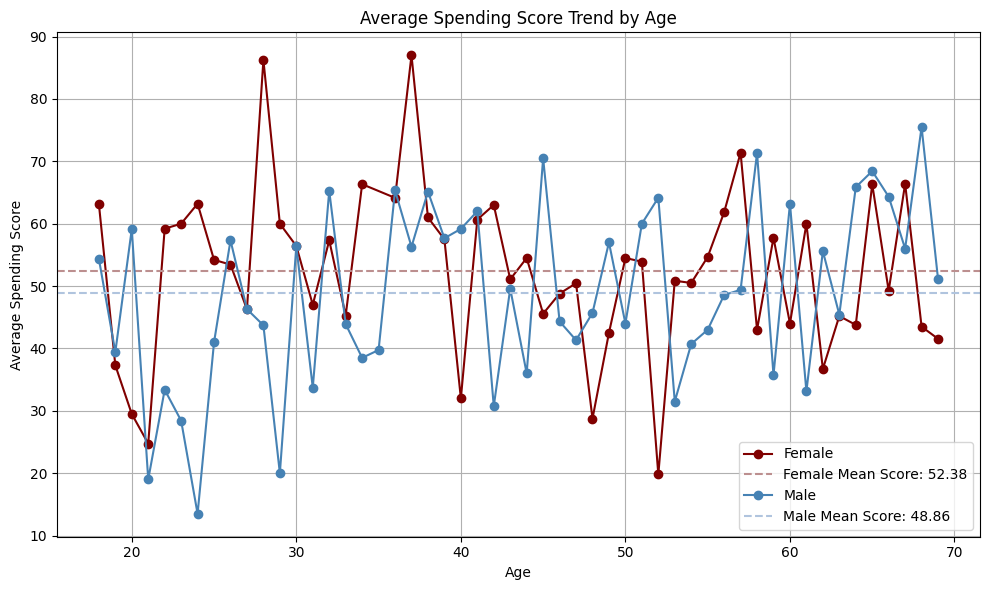

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Correct file path
path = '/content/cleaned_data.csv'

# Load the dataset
data = pd.read_csv(path)

# Strip any leading or trailing whitespace from the 'gender' column
data['gender'] = data['gender'].str.strip()

# Remove rows where 'Gender' is not 'Male' or 'Female'
data_cleaned = data[data['gender'].isin(['Male', 'Female'])]

# Separate data by gender
female_data = data_cleaned[data_cleaned['gender'] == 'Female']
male_data = data_cleaned[data_cleaned['gender'] == 'Male']

# Group by Age and calculate mean spending score for each group
female_age_groups = female_data.groupby('age')['spending_score'].mean()
male_age_groups = male_data.groupby('age')['spending_score'].mean()

# Plotting
plt.figure(figsize=(10, 6))

# Plot for female_data
plt.plot(
    female_age_groups.index,
    female_age_groups.values,
    marker='o',
    linestyle='-',
    color='maroon',
    label='Female'
)
plt.axhline(
    y=female_age_groups.mean(),
    color='rosybrown',
    linestyle='--',
    label=f'Female Mean Score: {female_age_groups.mean():.2f}'
)

# Plot for male_data
plt.plot(
    male_age_groups.index,
    male_age_groups.values,
    marker='o',
    linestyle='-',
    color='steelblue',
    label='Male'
)
plt.axhline(
    y=male_age_groups.mean(),
    color='lightsteelblue',
    linestyle='--',
    label=f'Male Mean Score: {male_age_groups.mean():.2f}'
)

# Title and labels
plt.title('Average Spending Score Trend by Age')
plt.xlabel('Age')
plt.ylabel('Average Spending Score')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


As showen above, Females between age 25 - 40 have higher spending average score in comparision with males in late 65th.

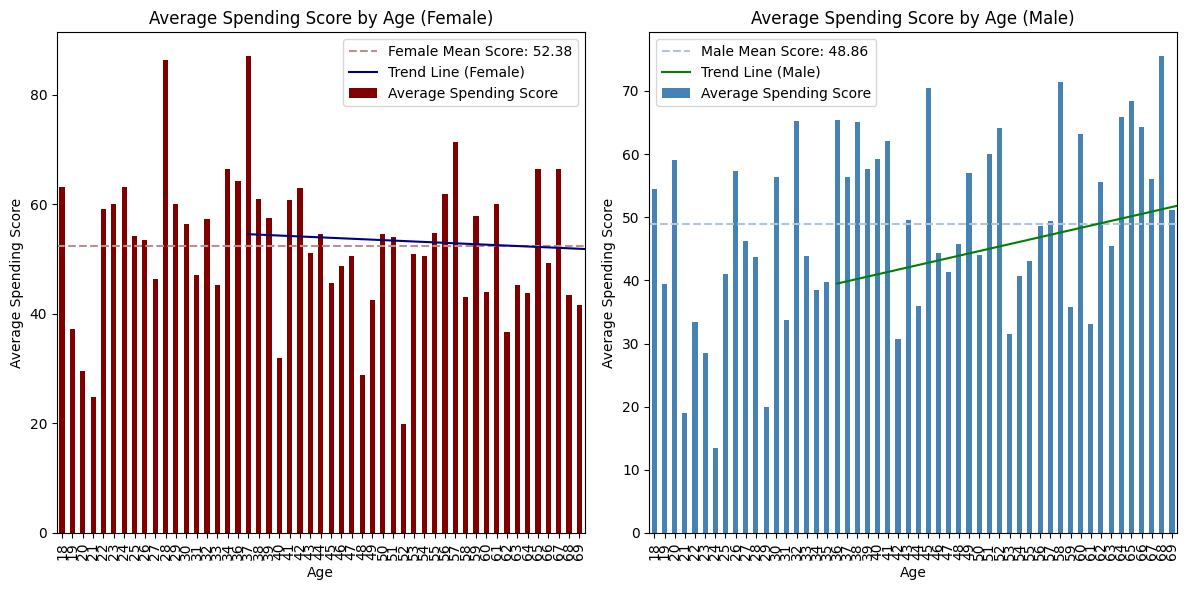

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


path = '/content/cleaned_data.csv'
data = pd.read_csv(path)

# Strip any leading or trailing whitespace from the 'gender' column
data['gender'] = data['gender'].str.strip()

# Remove rows where 'Gender' is not 'Male' or 'Female'
data_cleaned = data[data['gender'].isin(['Male', 'Female'])]

# Separate data by gender
female_data = data_cleaned[data_cleaned['gender'] == 'Female']
male_data = data_cleaned[data_cleaned['gender'] == 'Male']

# Group by Age and calculate mean spending score for each group
female_age_groups = female_data.groupby('age')['spending_score'].mean()
male_age_groups = male_data.groupby('age')['spending_score'].mean()

# Plotting
plt.figure(figsize=(12, 6))

# Plot for female_data (Bar graph)
plt.subplot(1, 2, 1)
female_age_groups.plot(kind='bar', color='maroon', label='Average Spending Score')
plt.axhline(y=female_age_groups.mean(), color='rosybrown', linestyle='--', label=f'Female Mean Score: {female_age_groups.mean():.2f}')

# Add trend line for females
x_female = female_age_groups.index
y_female = female_age_groups.values
slope_female, intercept_female, _, _, _ = linregress(x_female, y_female)
plt.plot(x_female, slope_female * x_female + intercept_female, color='navy', linestyle='-', label='Trend Line (Female)')

plt.title('Average Spending Score by Age (Female)')
plt.xlabel('Age')
plt.ylabel('Average Spending Score')
plt.legend()

# Plot for male_data (Bar graph)
plt.subplot(1, 2, 2)
male_age_groups.plot(kind='bar', color='steelblue', label='Average Spending Score')
plt.axhline(y=male_age_groups.mean(), color='lightsteelblue', linestyle='--', label=f'Male Mean Score: {male_age_groups.mean():.2f}')

# Add trend line for males
x_male = male_age_groups.index
y_male = male_age_groups.values
slope_male, intercept_male, _, _, _ = linregress(x_male, y_male)
plt.plot(x_male, slope_male * x_male + intercept_male, color='green', linestyle='-', label='Trend Line (Male)')

plt.title('Average Spending Score by Age (Male)')
plt.xlabel('Age')
plt.ylabel('Average Spending Score')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


As showen in the results, the female **trend line** is decreasing and the male **trend line** is increasing by age.

# <font color='maroon'>**PySpark**</font>



In [62]:
pip install pyspark

In [63]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Customer Segmentation") \
    .getOrCreate()

In [96]:
from pyspark.sql import SparkSession

# Stop the existing Spark session if it exists
try:
    spark.stop()
except NameError:
    pass

# Initialize a new Spark session
spark = SparkSession.builder \
    .appName("Customer Segmentation") \
    .config("spark.executor.memory", "2g") \
    .config("spark.driver.memory", "2g") \
    .getOrCreate()

# Define the path to the cleaned dataset
data_path = "/content/cleaned_data.csv"

# Load the cleaned dataset
df = spark.read.csv(data_path, header=True, inferSchema=True)

# Show the first few rows
df.show(5)


+---+---+------+------+--------------+----------------+------------------+--------------------+
| id|age|gender|income|spending_score|membership_years|purchase_frequency|last_purchase_amount|
+---+---+------+------+--------------+----------------+------------------+--------------------+
|  1| 38|Female| 99342|            90|               3|                24|              113.53|
|  2| 21|Female| 78852|            60|               2|                42|               41.93|
|  3| 60|Female|126573|            30|               2|                28|              424.36|
|  5| 65|Female|140621|            21|               3|                25|              347.08|
|  8| 43|  Male|108115|            94|               9|                27|              734.56|
+---+---+------+------+--------------+----------------+------------------+--------------------+
only showing top 5 rows



In [97]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- income: integer (nullable = true)
 |-- spending_score: integer (nullable = true)
 |-- membership_years: integer (nullable = true)
 |-- purchase_frequency: integer (nullable = true)
 |-- last_purchase_amount: double (nullable = true)



In [98]:
df.describe().show()

+-------+------------------+------------------+------+------------------+-----------------+-----------------+------------------+--------------------+
|summary|                id|               age|gender|            income|   spending_score| membership_years|purchase_frequency|last_purchase_amount|
+-------+------------------+------------------+------+------------------+-----------------+-----------------+------------------+--------------------+
|  count|               673|               673|   673|               673|              673|              673|               673|                 673|
|   mean|503.74294205052007| 43.11144130757801|  NULL| 88490.15750371471|50.14858841010401|5.448736998514116|26.950965824665676|  478.21417533432447|
| stddev| 287.0350290992756|14.859993525979746|  NULL|34731.715973062564|29.15356358289376|2.838007723206067| 14.04792932293664|   299.3000868568382|
|    min|                 1|                18|Female|             30004|                1|         

In [99]:
from pyspark.sql.functions import col, sum

# Calculate null counts for each column
null_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])

# Convert result to Pandas DataFrame for better visualization
null_counts_pd = null_counts.toPandas().transpose()

# Print the null counts
print("Null Counts:")
print(null_counts_pd)

Null Counts:
                      0
id                    0
age                   0
gender                0
income                0
spending_score        0
membership_years      0
purchase_frequency    0
last_purchase_amount  0


In [101]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean, max

# Initialize a Spark session
spark = SparkSession.builder.appName("Customer Segmentation").getOrCreate()

# Load the cleaned dataset
data_path = "/content/cleaned_data.csv"
df = spark.read.csv(data_path, header=True, inferSchema=True)

# Perform groupBy and aggregate operations
grouped_data = df.groupBy("gender").agg(
    mean(col("income")).alias("Average Annual Income"),
    max(col("spending_score")).alias("Max Spending Score")
)

# Show the grouped results
grouped_data.show()


+------+---------------------+------------------+
|gender|Average Annual Income|Max Spending Score|
+------+---------------------+------------------+
|Female|    88018.10443037975|               100|
|  Male|    88907.99719887956|               100|
+------+---------------------+------------------+



In [128]:
import os
print(" Files in directory:", os.listdir("."))


 Files in directory: ['.config', 'cleaned_data.csv', 'processed_data_output', 'processed_data.csv', 'sample_data']


In [141]:
import os
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Customer Segmentation - Save Processed Data") \
    .config("spark.executor.memory", "2g") \
    .config("spark.driver.memory", "2g") \
    .getOrCreate()

# Define the output directory
output_dir = "processed_data_output"

# Save the updated DataFrame to the specified directory
df.write.mode("overwrite").option("header", "true").csv(output_dir)

# Check if the directory has been created and list the files
if os.path.exists(output_dir):
    print(f" Directory '{output_dir}' created and CSV files are saved.")

    # List the files inside the directory
    files = os.listdir(output_dir)
    if files:
        print(" Files in the directory:")
        for file in files:
            print(f" - {file}")
    else:
        print(" No files found in the directory.")
else:
    print(f" Failed to create directory '{output_dir}'.")


 Directory 'processed_data_output' created and CSV files are saved.
 Files in the directory:
 - ._SUCCESS.crc
 - part-00000-31c829a5-5edb-43ad-aafc-7baad1d20d49-c000.csv
 - _SUCCESS
 - .part-00000-31c829a5-5edb-43ad-aafc-7baad1d20d49-c000.csv.crc


In [77]:
import os
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Customer Segmentation - Save Processed Data") \
    .config("spark.executor.memory", "2g") \
    .config("spark.driver.memory", "2g") \
    .getOrCreate()

# Define the output directory
output_dir = "processed_data_output"

# Save the updated DataFrame to the specified directory
df.write.mode("overwrite").option("header", "true").csv(output_dir)

# Check if the directory has been created and list the files
if os.path.exists(output_dir):
    print(f" Directory '{output_dir}' created and CSV files are saved.")

    # List the files inside the directory
    files = os.listdir(output_dir)
    if files:
        print(" Files in the directory:")
        for file in files:
            print(f" - {file}")
    else:
        print(" No files found in the directory.")
else:
    print(f" Failed to create directory '{output_dir}'.")


 Directory 'processed_data_output' created and CSV files are saved.
 Files in the directory:
 - .part-00000-a9e566b4-328f-402c-8d49-aee604b226c7-c000.csv.crc
 - part-00000-a9e566b4-328f-402c-8d49-aee604b226c7-c000.csv
 - ._SUCCESS.crc
 - _SUCCESS


In [75]:
import os
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Load Processed CSV") \
    .config("spark.executor.memory", "2g") \
    .config("spark.driver.memory", "2g") \
    .getOrCreate()

# Define the output directory
output_dir = "processed_data_output"

# List all files in the directory
files = os.listdir(output_dir)

# Find the first actual CSV file (ignoring metadata files)
csv_file = next((f for f in files if f.startswith("part-") and f.endswith(".csv")), None)

if csv_file:
    # Construct the full file path
    csv_path = os.path.join(output_dir, csv_file)

    # Load the saved CSV file
    saved_df = spark.read.csv(csv_path, header=True, inferSchema=True)

    # Show the contents of the saved DataFrame
    print(f" Successfully loaded: {csv_file}")
    saved_df.show(10)
else:
    print(" No valid CSV data files found in the directory.")


 Successfully loaded: part-00000-ac0c0304-a006-44fb-b7bb-099b5535f04f-c000.csv
+---+---+------+------+--------------+----------------+------------------+------------------+--------------------+
| id|age|gender|income|spending_score|membership_years|purchase_frequency|preferred_category|last_purchase_amount|
+---+---+------+------+--------------+----------------+------------------+------------------+--------------------+
|  1| 38|Female| 99342|            90|               3|                24|         Groceries|              113.53|
|  2| 21|Female| 78852|            60|               2|                42|            Sports|               41.93|
|  3| 60|Female|126573|            30|               2|                28|          Clothing|              424.36|
|  4| 40| Other| 47099|            74|               9|                 5|     Home & Garden|              991.93|
|  5| 65|Female|140621|            21|               3|                25|       Electronics|              347.08|
|

In [132]:
import os

data_path = "cleaned_data.csv"

if os.path.exists(data_path):
    print(f" File exists: {data_path}")
else:
    print(f" File not found: {data_path}")


 File exists: cleaned_data.csv


In [133]:
import os
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Customer Segmentation") \
    .config("spark.executor.memory", "2g") \
    .config("spark.driver.memory", "2g") \
    .getOrCreate()

# Define dataset path
data_path = "/content/cleaned_data.csv"

# Load the cleaned dataset
df = spark.read.csv(data_path, header=True, inferSchema=True)

# Show schema to verify data types
df.printSchema()

# Show basic statistics
df.describe().show()

# Filter customers older than 30
filtered_data = df.filter(col("age") > 30)
filtered_data.show(10)

# Count the number of male and female customers
gender_count = df.groupBy("gender").count()
gender_count.show()

# Add Age Category column with proper categorization
df = df.withColumn(
    "age_category",
    when(col("age") < 30, "Young")
    .when((col("age") >= 30) & (col("age") <= 50), "Middle-aged")
    .otherwise("Old")
)

# Show the updated DataFrame with age categories
df.show(10)

# Define output directory for saving the processed data
output_dir = "processed_data_output"

# Save the updated DataFrame to the specified directory
df.write.mode("overwrite").option("header", "true").csv(output_dir)

# Verify if the directory has been created and list its contents
if os.path.exists(output_dir):
    print(f" Directory '{output_dir}' created and CSV files are saved.")

    # List the files inside the directory
    files = os.listdir(output_dir)
    if files:
        print(" Files in the directory:")
        for file in files:
            print(f" - {file}")
    else:
        print(" No files found in the directory.")
else:
    print(f" Failed to create directory '{output_dir}'.")

# Dynamically find the correct CSV file to load
csv_file = next((f for f in files if f.startswith("part-") and f.endswith(".csv")), None)

if csv_file:
    # Construct the full file path
    csv_path = os.path.join(output_dir, csv_file)

    # Load the saved CSV file
    saved_df = spark.read.csv(csv_path, header=True, inferSchema=True)

    # Show the contents of the saved DataFrame
    print(f" Successfully loaded: {csv_file}")
    saved_df.show(10)
else:
    print(" No valid CSV data files found in the directory.")


root
 |-- id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- income: integer (nullable = true)
 |-- spending_score: integer (nullable = true)
 |-- membership_years: integer (nullable = true)
 |-- purchase_frequency: integer (nullable = true)
 |-- last_purchase_amount: double (nullable = true)

+-------+------------------+------------------+------+------------------+-----------------+-----------------+------------------+--------------------+
|summary|                id|               age|gender|            income|   spending_score| membership_years|purchase_frequency|last_purchase_amount|
+-------+------------------+------------------+------+------------------+-----------------+-----------------+------------------+--------------------+
|  count|               673|               673|   673|               673|              673|              673|               673|                 673|
|   mean|503.74294205052007| 43.11144130757801|

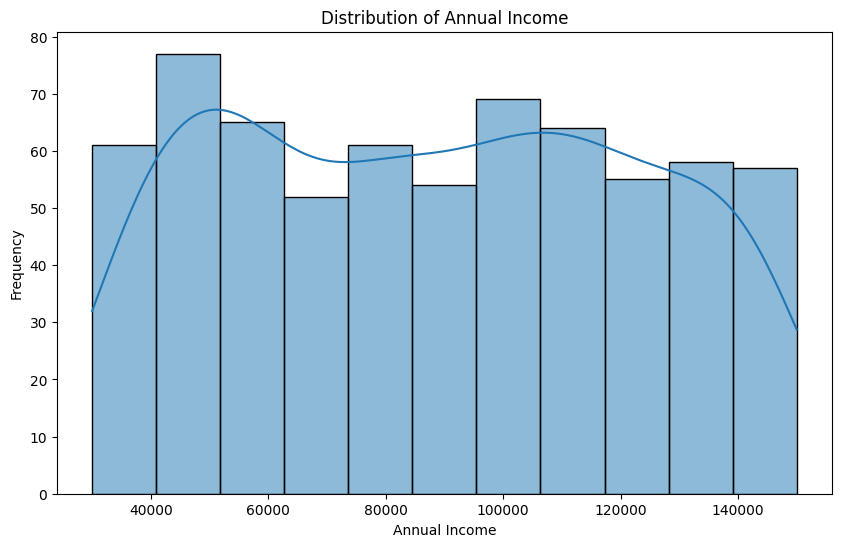

In [146]:
import pandas as pd

# Convert the Spark DataFrame to a Pandas DataFrame
df_pd = df.toPandas()

# Visualize the distribution of Annual Income
plt.figure(figsize=(10, 6))
sns.histplot(df_pd["income"], kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()



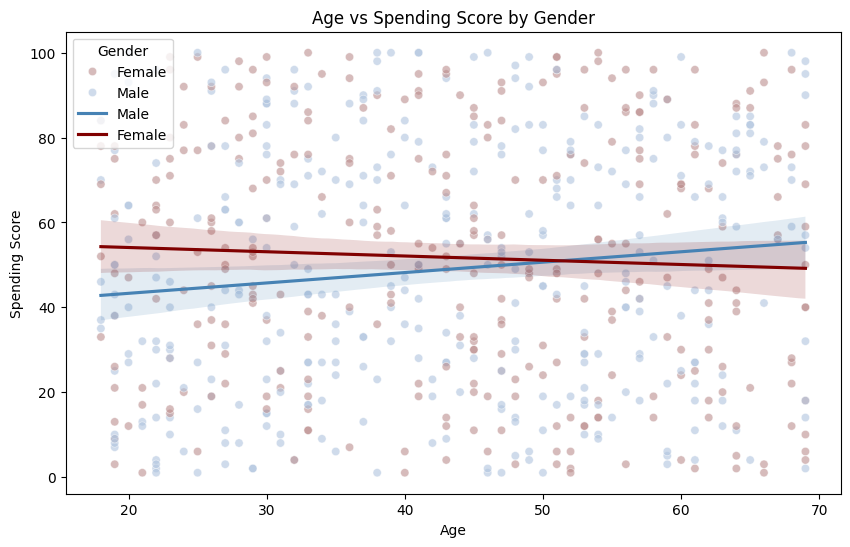

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Spark DataFrame to Pandas
df_pd = df.select("age", "spending_score", "gender").toPandas()

# Create the scatter plot with trend lines
plt.figure(figsize=(10, 6))

# Scatter plot with custom dot colors
sns.scatterplot(
    data=df_pd,
    x="age",
    y="spending_score",
    hue="gender",
    palette={"Male": "lightsteelblue", "Female": "rosybrown"},
    alpha=0.6
)

# Trend lines for each gender
sns.regplot(
    data=df_pd[df_pd["gender"] == "Male"],
    x="age",
    y="spending_score",
    scatter=False,
    label='Male',
    color='steelblue'
)
sns.regplot(
    data=df_pd[df_pd["gender"] == "Female"],
    x="age",
    y="spending_score",
    scatter=False,
    label='Female',
    color='maroon'
)

# Add labels and title
plt.title('Age vs Spending Score by Gender')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend(title='Gender')

# Show plot
plt.show()


# <font color='maroon'>**Hadoop MapReduce**</font>



Instead of Hadoop MapReduce, I used PySpark’s DataFrame API to perform the same computations.

I will be using PySpark’s DataFrame API to calculate average spending score per age group.

In [150]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean

# Initialize Spark
spark = SparkSession.builder.appName("Spending Score Analysis").getOrCreate()

# Load data
df = spark.read.csv("cleaned_data.csv", header=True, inferSchema=True)

# Create Age Groups (Simulating the Mapper)
df = df.withColumn("age_group",
    when(col("age") < 30, "20s")
    .when((col("age") >= 30) & (col("age") < 40), "30s")
    .when((col("age") >= 40) & (col("age") < 50), "40s")
    .when((col("age") >= 50) & (col("age") < 60), "50s")
    .when((col("age") >= 60) & (col("age") < 70), "60s")
    .otherwise("70+")
)

# Aggregate (Simulating the Reducer)
result = df.groupBy("age_group").agg(mean("spending_score").alias("avg_spending_score"))

# Show results
result.show()


+---------+------------------+
|age_group|avg_spending_score|
+---------+------------------+
|      40s|  49.5514705882353|
|      20s|47.089171974522294|
|      50s| 50.32330827067669|
|      60s| 51.32773109243698|
|      30s|        53.2578125|
+---------+------------------+



In [152]:
import time

# Measure PySpark execution time
start_time = time.time()
spark_result = df.groupBy("age_group").agg(mean("spending_score").alias("avg_spending_score"))
spark_result.show()
print(f" Execution Time: {time.time() - start_time:.2f} seconds")


+---------+------------------+
|age_group|avg_spending_score|
+---------+------------------+
|      40s|  49.5514705882353|
|      20s|47.089171974522294|
|      50s| 50.32330827067669|
|      60s| 51.32773109243698|
|      30s|        53.2578125|
+---------+------------------+

 Execution Time: 0.81 seconds


- People in their 30s have the highest average spending score (53.26).
- People in their 20s have the lowest average spending score (47.09).
- Spending score increases slightly from 40s to 60s.

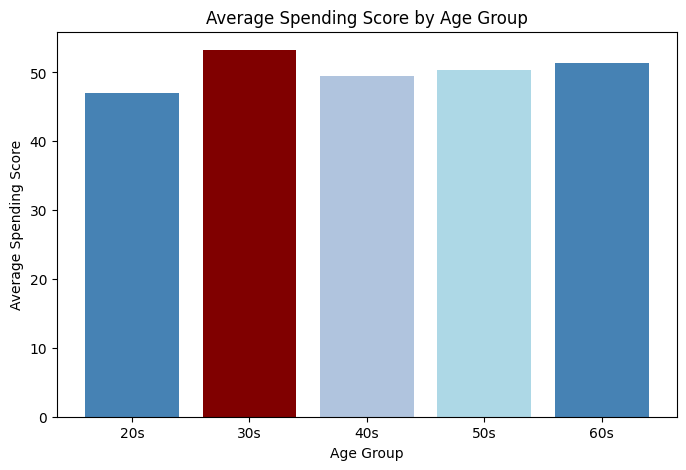

In [156]:
import matplotlib.pyplot as plt

# Convert PySpark DataFrame to Pandas for plotting
df_plot = result.toPandas()

# Sort for better visualization
df_plot = df_plot.sort_values(by="age_group")

# Plotting the results
plt.figure(figsize=(8, 5))
plt.bar(df_plot["age_group"], df_plot["avg_spending_score"], color=["steelblue", "maroon", "lightsteelblue", "lightblue", "steelblue"])

# Labels and title
plt.xlabel("Age Group")
plt.ylabel("Average Spending Score")
plt.title("Average Spending Score by Age Group")

# Show plot
plt.show()


### **Finding:**
* The analysis shows that people in their 30s have the highest spending score (53.
26), while people in their 20s have the lowest (47.09)."

# <font color='maroon'>**GitHub Link**</font>



# <font color='maroon'>**Assessment Submission Form**</font>



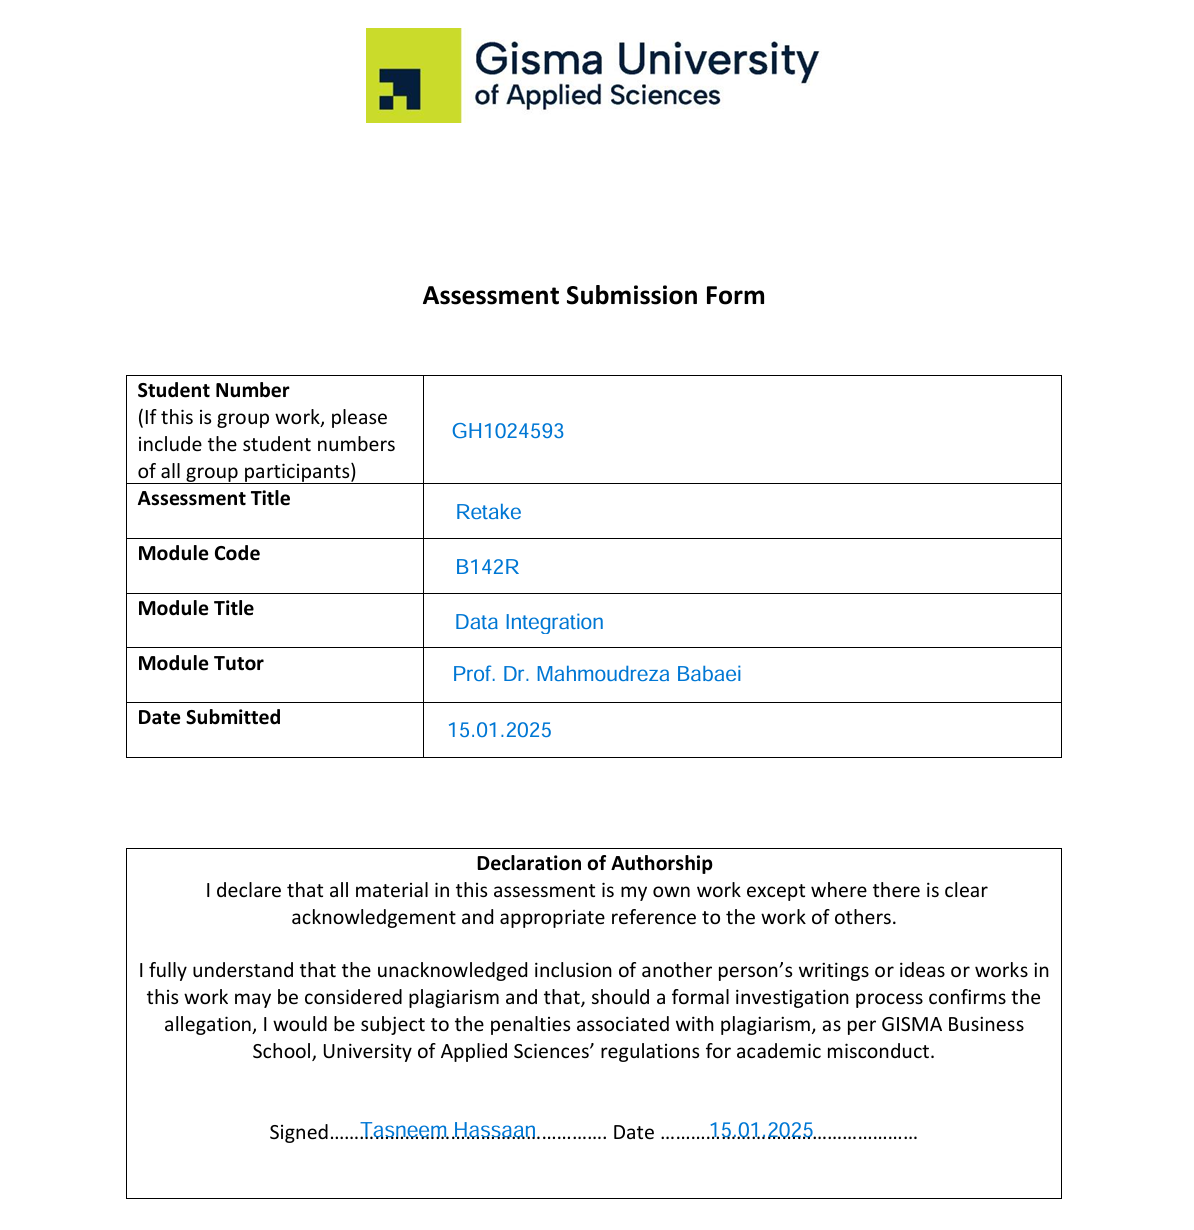